# Analyzing Maryland's Crime Rates from 1975 to 2019 (Just How Bad is Baltimore City?)

Anh-Minh Nguyen UID:115348097

## 1. Introduction

In this project, I will look at the crime rates in counties across the state of Maryland and to see which counties are the saftest to live in as well as which counties are getting better or worst in terms of crime rate. Later, I will see if there is a correlation between crime rate and income. 

### 1.1 Background Information

Growing up in the suburbs of Montgomery County Maryland, I did not see much crime happening where I was living. Occasionally I will see the usual stop sign skippers, traffic violators, and child candy bar culprit, but never anything huge such as murder, rape, or robbery. I always hear how bad Baltimore City is and to avoid Baltimore at all costs. However, going to Baltimore City a few times, I noticed that Baltimore seemed to be on the poorer side of Maryland, run down buisness building, unpaved roads, and trash littered the streets. That got me to wonder if Baltimore City really is a dangerous city and if so, is it getting better or worse, as well as other counties across Maryland. 

### 1.2 Library Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

## 2. About the Data

The datasets I'm using is from Marylands Open Data Portal

### 2.1 Data Sources
Violent Crime & Property Crime by County: 1975 to Present This dataset contains counties in Maryland as well as crimes such as murder, rape, and robbery. in addition, this has the grand total crime, crime rate, and percentage change from year to year
https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs

Maryland Total Personal Income (Thousands of Current Dollars): 2010-2018. This Dataset contains each counties Total Personal Income from 2010 to 2018.
https://opendata.maryland.gov/Demographic/Maryland-Total-Personal-Income-Thousands-of-Curren/m4dq-89ja

### 2.2 Data Load and view

The first step is to load all the data onto the workspace so that it can be used and interpreted. I downloaded all the data as a csv so I will use pandas to read all the data and turn them into a usable table 

In [2]:
Maryland_Crime = pd.read_csv("Violent_Crime___Property_Crime_by_County__1975_to_Present.csv")
Maryland_Crime.sort_values(by=['JURISDICTION', 'YEAR'], inplace=True)
Maryland_Crime.head()

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


In [3]:
Maryland_Income = pd.read_csv("Maryland_Total_Personal_Income__Thousands_of_Current_Dollars___2010-2018 (1).csv")
Maryland_Income.head()

,Date created,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,"September 29, 2020",2010,289469915,2398887,28572128,23594186,39768153,4464447,1139213,8065067,...,918667,69168272,35447497,2372077,680151,4961849,2162949,5477359,3431685,2289412
1,"September 29, 2020",2011,306179571,2479759,30407771,24915883,41100376,4678943,1205996,8452740,...,963589,74484881,37153669,2510475,692927,5266435,2268506,5754637,3547615,2384412
2,"September 29, 2020",2012,315230873,2509845,31467873,25382312,42522562,4784145,1265186,8662080,...,970340,77350599,37781264,2600589,698505,5364105,2299797,5934944,3561639,2526217
3,"September 29, 2020",2013,314266477,2538578,31825911,25964317,42624474,4782328,1301301,8743854,...,982198,74736158,38015019,2616833,730235,5368766,2337664,5986621,3643603,2554445
4,"September 29, 2020",2014,325835823,2614103,33134966,27473102,44411599,4931675,1331697,9115252,...,1029626,76750007,39243945,2714137,759875,5555937,2404274,6217497,3862649,2644072


## 3. Data Analysis & Visualization

### 3.1 Total Crime over Time

I first want to plot a line plot just to see the Grand Total of Crime Per Jurisdiction Over the Years. with this I can see which Jurisdiction had the highest grand total of crime at a certain time and if over the years the number of grand totals of crime went up or down

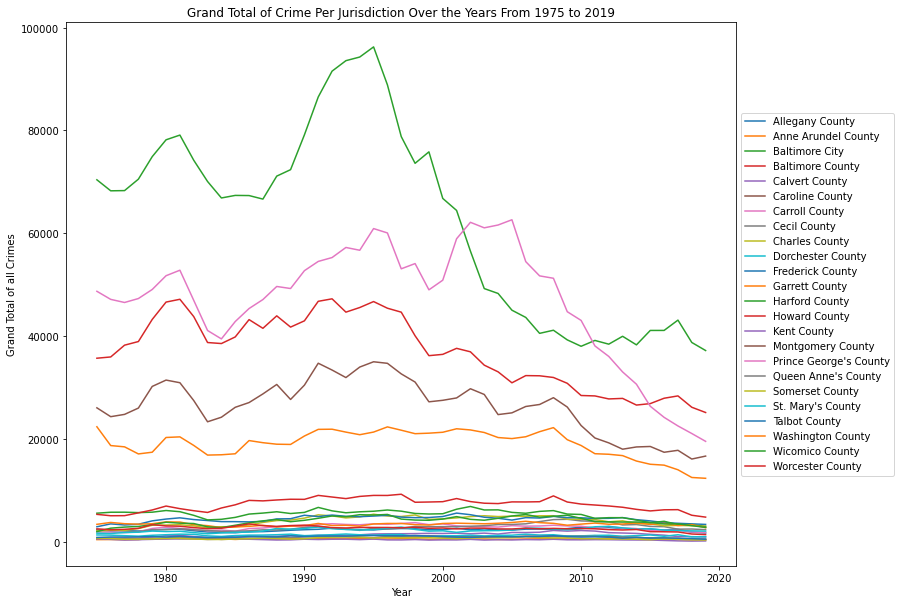

In [4]:
# obtain a list of all the jurisdictions
jurisdiction = Maryland_Crime['JURISDICTION'].drop_duplicates()
jurisdiction = jurisdiction.reset_index(drop=True)

interesting_jurisdictions = ["Baltimore City", 'Prince George\'s County', 'Howard County',\
                             'Baltimore County', 'Montgomery County', 'Anne Arundel County']

# creates the graph and the x, y axis
plt.figure(figsize = (12, 10))
plt.title("Grand Total of Crime Per Jurisdiction Over the Years From 1975 to 2019")
plt.xlabel("Year")
plt.ylabel("Grand Total of all Crimes")

# for each jurisdiction, it plots the growth or decline of crime from 1975 to 2019
for j in jurisdiction:
    curr_juresdiction = Maryland_Crime[Maryland_Crime['JURISDICTION'] == j]
    plt.plot(curr_juresdiction['YEAR'], curr_juresdiction['GRAND TOTAL'])
    
# adding a legend
plt.legend(jurisdiction, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Looking at the plot, the five jurisdictions the stands out the most are Baltimore City, Price George's County, Baltimore County, Montgomery County, and Anne Arundel County.
From 1975 to 2019, Baltimore City had the highest total crime (with the highest in 1995
with a grand total crime count of 96,243) except for 2002 to 2011 where Price George's had the highest Grand Total of Crime.
While the above graph looks at grand total, I want to split it into violence crime and property crime

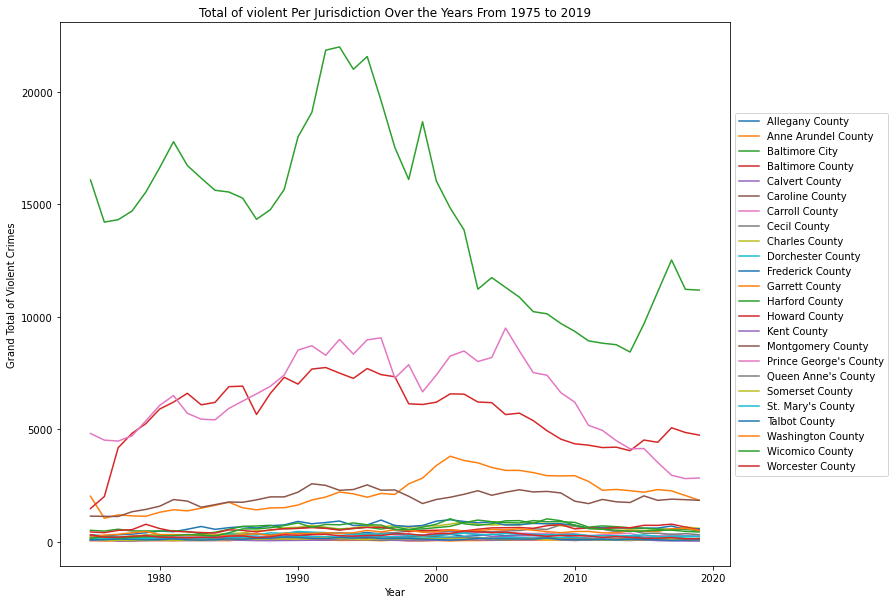

In [5]:
# creates the graph and the x, y axis
plt.figure(figsize = (12, 10))
plt.title("Total of violent Per Jurisdiction Over the Years From 1975 to 2019")
plt.xlabel("Year")
plt.ylabel("Grand Total of Violent Crimes")


# for each jurisdiction, it plots the growth or decline of crime from 1975 to 2019
for j in jurisdiction:
    curr_juresdiction = Maryland_Crime[Maryland_Crime['JURISDICTION'] == j]
    plt.plot(curr_juresdiction['YEAR'], curr_juresdiction['VIOLENT CRIME TOTAL'])
    
# adding a legend
plt.legend(jurisdiction, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

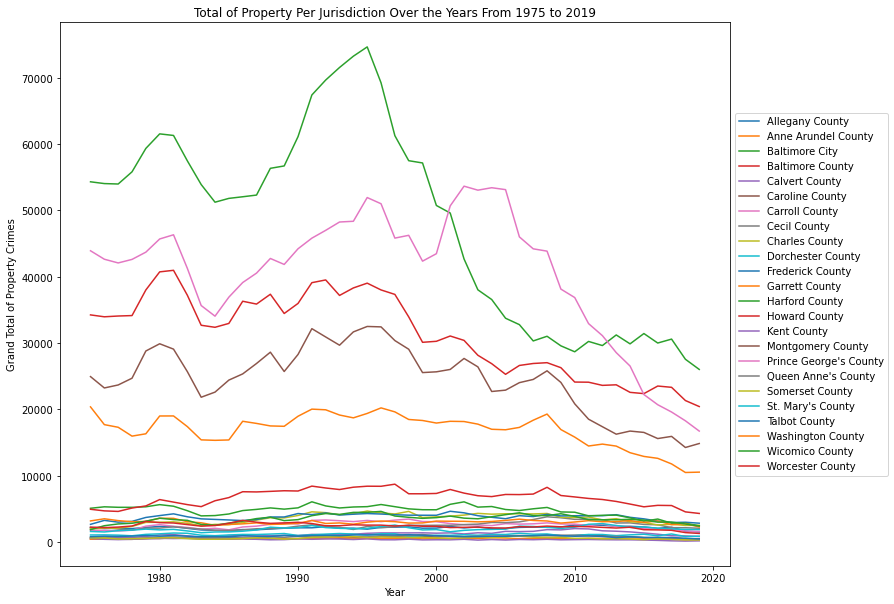

In [6]:
# creates the graph and the x, y axis
plt.figure(figsize = (12, 10))
plt.title("Total of Property Per Jurisdiction Over the Years From 1975 to 2019")
plt.xlabel("Year")
plt.ylabel("Grand Total of Property Crimes")

# for each jurisdiction, it plots the growth or decline of crime from 1975 to 2019
for j in jurisdiction:
    curr_juresdiction = Maryland_Crime[Maryland_Crime['JURISDICTION'] == j]
    plt.plot(curr_juresdiction['YEAR'], curr_juresdiction['PROPERTY CRIME TOTALS'])
    
# adding a legend
plt.legend(jurisdiction, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

And again, the five jurisdictions the stands out the most are Baltimore City, Prince George's County, Baltimore County, Montgomery County, and Anne Arundel County, with Baltimore City almost always being the jurisdiction with the highest crime rate in both violence and property, except for in 2002 to 2013 where Price George's County had a higher property crime total. For the rest of the project, I will only be looking at the grand total crime and not look at violent and property crime separately, since for this report it does not matter which type of crime was committed but if a crime was committed.

### 3.2 Crime Percentage Change

looking at the three above plots, it would be easy to conclude that Baltimore City is the worst in terms of crime, and therefore should be avoided. However, I now want to look at the percentage change of the total crime per jurisdiction. I will first look at the average change of total crime per jurisdiction, keeping in mind that a negative percentage means crime is going down while a positive percentage mean crime is going up.

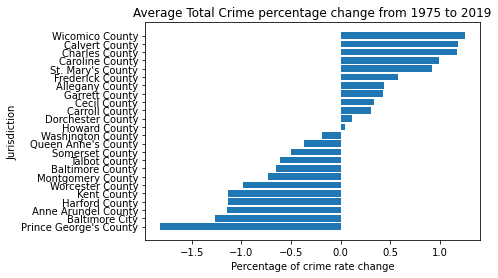

In [7]:
# creates the title and the x, y axis
plt.title("Average Total Crime percentage change from 1975 to 2019")
plt.xlabel("Percentage of crime rate change")
plt.ylabel("Jurisdiction")

# makes a new mini Maryland Crime database
d = {'JURISDICTION': jurisdiction, 'TOTAL CRIME PERCENT CHANGE AVERAGE': 0,
    'TOTAL CRIME PERCENT CHANGE FIRST AND LAST': 0,
    'TOTAL CRIME PERCENT CHANGE AVERAGE PER 100,000': 0,
    'TOTAL CRIME PERCENT CHANGE FIRST AND LAST PER 100,000': 0}
mini_Maryland_crime = pd.DataFrame(data=d)
percentage_change_average = []

# for each jurisdiction, it plots the average percentage crime change from 1975 to 2019
for j in jurisdiction:
    curr_juresdiction = Maryland_Crime[Maryland_Crime['JURISDICTION'] == j]   
    percentage_change_average.append(curr_juresdiction['PERCENT CHANGE'].mean())

mini_Maryland_crime['TOTAL CRIME PERCENT CHANGE AVERAGE'] = percentage_change_average

# sorts the percentage in decending order
mini_Maryland_crime.sort_values(by=['TOTAL CRIME PERCENT CHANGE AVERAGE'], inplace=True)

# plots the JURISDICTION and TOTAL CRIME PERCENT CHANGE AVERAGE as a bar graph
plt.barh(mini_Maryland_crime['JURISDICTION'], mini_Maryland_crime['TOTAL CRIME PERCENT CHANGE AVERAGE'])

plt.show()

Looking at the above graph, Baltimore city had the second highest negative percentage change. This means every year on average, the crime rate in Baltimore city is going down by -1.3% from 1975 to 2019. Prince George's county had the highest negative percentage change with a value of -1.8%, while Wicomico County had the highest positive percentage change with a value of 1.3%, meaning every year from 1975 to 2019, Wicomico County is getting more dangerous with their crime total gaining 1.3% every year.

Now that I have the average change per year, I want to look at how the percentage change between 1975 and 2019 of each jurisdiction. Meaning, I will compare directly the total crime percentage change of each jurisdiction's 1975 total crime total to their 2019 total crime total.

<ipython-input-8-f660ccf4b600>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_juresdiction.sort_values(by=['YEAR'], inplace=True)


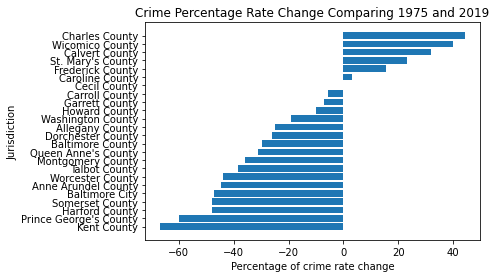

In [8]:
# creates the title and the x, y axis
plt.title("Crime Percentage Rate Change Comparing 1975 and 2019")
plt.xlabel("Percentage of crime rate change")
plt.ylabel("Jurisdiction")

percentage_change_first_and_last = []

# for each jurisdiction, it plots the crime percentage difference between 1975 crime rate and 2019 crime rate
for j in jurisdiction:
    curr_juresdiction = Maryland_Crime[Maryland_Crime['JURISDICTION'] == j]
    curr_juresdiction.sort_values(by=['YEAR'], inplace=True)
    
    first_year = curr_juresdiction.loc[curr_juresdiction.index[0], 'GRAND TOTAL']
    last_year = curr_juresdiction.loc[curr_juresdiction.index[44], 'GRAND TOTAL']  
    change = last_year - first_year
    percentage_change = (change / first_year) * 100
    
    percentage_change_first_and_last.append(percentage_change)
    
mini_Maryland_crime.sort_values(by=['JURISDICTION'], inplace=True)
mini_Maryland_crime['TOTAL CRIME PERCENT CHANGE FIRST AND LAST'] = percentage_change_first_and_last

# sorts the percentage in decending order
mini_Maryland_crime.sort_values(by=['TOTAL CRIME PERCENT CHANGE FIRST AND LAST'], inplace=True)

# plots the JURISDICTION and TOTAL CRIME PERCENT CHANGE FIRST AND LAST as a bar graph
plt.barh(mini_Maryland_crime['JURISDICTION'], mini_Maryland_crime['TOTAL CRIME PERCENT CHANGE FIRST AND LAST'])

plt.show()

Now if we look at the above plot, Baltimore City has a total percentage of -47.14% meaning between 1975 and 2019, crime rate as gone down -47.14 %, Baltimore is safer in 2019 than it was in 1975. Kent County saw the highest negative percentage change with -66.72%, making Kent County safest in terms of the highest decrease in crime rate between 1975 and 2019. 

While most jurisdiction saw a decrease in crime percentage between 1975 and 2019, six jurisdictions saw in increase in their crime total. Charles County, Wicomico County, Calvert County, St. Mary's County, Frederick County, Caroline County, saw an increase of 44.20%, 39.99%, 32.02%, 23.16%, 15.56%, and 3.03% respectively.

### 3.3 Crime Rate Per 100,000 People

Before we looked at the grand total of how much crime was committed in each jurisdiction regardless of population. However, it is a good idea to look at the crime rate per a certain amount of population. For example, in a very small scale, if a town with a population of 10 had 1 crime vs a town with a population of 100,000 had 2 crimes, the town with the population of 100,000 would look bad compared to the other town because they had 2 crimes committed instead of 1, but in actuality the town with the population of 10 has a higher crime rate. That is why it is a good idea to look at the crime rate per a certain amount of population, in this case 100,000. Fortunately, this table already had a crime rate per 100,000 people columns.

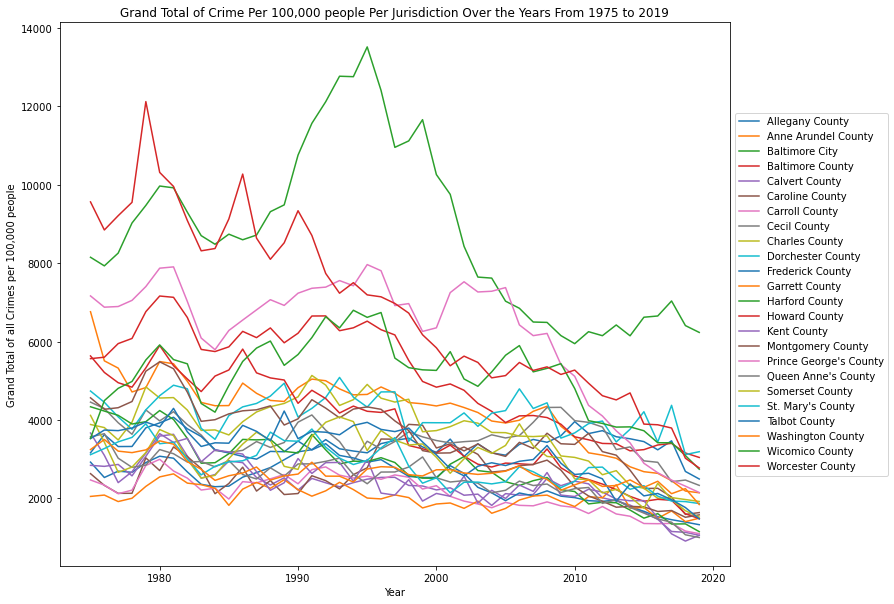

In [9]:
# creates the graph and the x, y axis
plt.figure(figsize = (12, 10))
plt.title("Grand Total of Crime Per 100,000 people Per Jurisdiction Over the Years From 1975 to 2019")
plt.xlabel("Year")
plt.ylabel("Grand Total of all Crimes per 100,000 people")

# for each jurisdiction, it plots the growth or decline of crime from 1975 to 2019 per 100,000 people
for j in jurisdiction:
    curr_juresdiction = Maryland_Crime[Maryland_Crime['JURISDICTION'] == j]
    plt.plot(curr_juresdiction['YEAR'], curr_juresdiction['OVERALL CRIME RATE PER 100,000 PEOPLE'])
    
# adding a legend
plt.legend(jurisdiction, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

The Jurisdictions that sort of standout are Baltimore City, Worcester County, and Prince George's County, with Worcester County starting out with the highest, then Baltimore City (highest of 13,513.3 per 100,000 in 1995), followed by Prince George's County for a year, and then ending with Baltimore City. However not many of the Jurisdictions stand out because all seem to be scattered across the board, unlike the first plot where most of the Jurisdictions were so close together that it was hard to tell them apart and had such a low crime total that they were mostly lines at the bottom of the graph.

Similarly, to the first plot, Baltimore City still has the highest total crime rate per 100,000 population in 2019, but one thing to point out is all the other jurisdictions had their crime rates per 100,000 population all be very close to one another with the margin about 2000 crime per 100,000 population. Queen's County in 2019 had the lowest crime rate per 100,000 people with with only 910.2 crime rate per 100,000.

### 3.4 Crime Rate Per 100,000 People Percentage Change

Similarly to before, I want to look at percentage change of the total crime per 100,000 people per jurisdiction. First I will look at average change of total crime rate per 100,000 people per jurisdiction and then the percentage change per 100,000 people  between 1975 and 2019 of each jurisdiction.

In [10]:
percentage_change_average_per_100000 = []
percentage_change_first_and_last_per_100000 = []

# for each jurisdiction, finds the average change per year as well as the percentage change between 1975 and 2019
for j in jurisdiction:
    curr_juresdiction = Maryland_Crime[Maryland_Crime['JURISDICTION'] == j]
    curr_juresdiction.sort_values(by=['YEAR'], inplace=True)
    
    first_year = curr_juresdiction.loc[curr_juresdiction.index[0], 'OVERALL CRIME RATE PER 100,000 PEOPLE']
    last_year = curr_juresdiction.loc[curr_juresdiction.index[44], 'OVERALL CRIME RATE PER 100,000 PEOPLE']  
    change = last_year - first_year
    percentage_change = (change / first_year) * 100
    
    percentage_change_first_and_last_per_100000.append(percentage_change)
    percentage_change_average_per_100000.append(curr_juresdiction['OVERALL PERCENT CHANGE PER 100,000 PEOPLE'].mean())
    
mini_Maryland_crime.sort_values(by=['JURISDICTION'], inplace=True)
mini_Maryland_crime['TOTAL CRIME PERCENT CHANGE AVERAGE PER 100,000'] = percentage_change_average_per_100000
mini_Maryland_crime['TOTAL CRIME PERCENT CHANGE FIRST AND LAST PER 100,000'] = percentage_change_first_and_last_per_100000

<ipython-input-10-a15f128b1894>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_juresdiction.sort_values(by=['YEAR'], inplace=True)


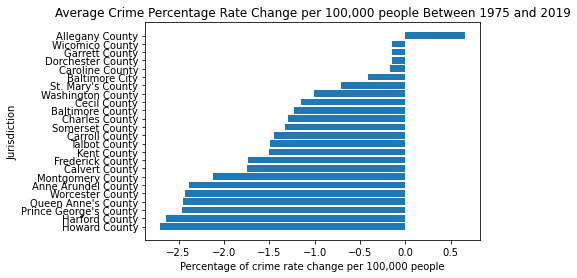

In [11]:
# creates the title and the x, y axis
plt.title("Average Crime Percentage Rate Change per 100,000 people Between 1975 and 2019")
plt.xlabel("Percentage of crime rate change per 100,000 people")
plt.ylabel("Jurisdiction")

# sorts the percentage in decending order
mini_Maryland_crime.sort_values(by=['TOTAL CRIME PERCENT CHANGE AVERAGE PER 100,000'], inplace=True)

# plots the JURISDICTION and TOTAL CRIME PERCENT CHANGE AVERAGE PER 100,000 as a bar graph
plt.barh(mini_Maryland_crime['JURISDICTION'], mini_Maryland_crime['TOTAL CRIME PERCENT CHANGE AVERAGE PER 100,000'])

plt.show()

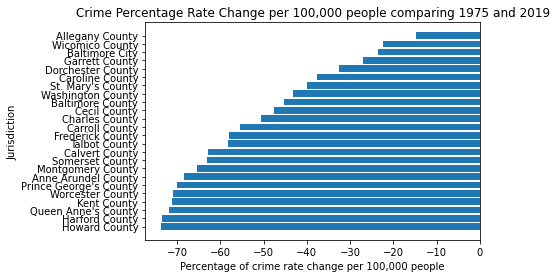

In [12]:
# creates the title and the x, y axis
plt.title("Crime Percentage Rate Change per 100,000 people comparing 1975 and 2019")
plt.xlabel("Percentage of crime rate change per 100,000 people")
plt.ylabel("Jurisdiction")

# sorts the percentage in decending order
mini_Maryland_crime.sort_values(by=['TOTAL CRIME PERCENT CHANGE FIRST AND LAST PER 100,000'], inplace=True)

# plots the JURISDICTION and TOTAL CRIME PERCENT CHANGE FIRST AND LAST PER 100,000 as a bar graph
plt.barh(mini_Maryland_crime['JURISDICTION'], mini_Maryland_crime['TOTAL CRIME PERCENT CHANGE FIRST AND LAST PER 100,000'])

plt.show()

The first graph shows that on average, Allegany County's crime rate went up .8% each year, and Baltimore City's crime rate goes down by .4% each year. However, looking at the second plot, every jurisdiction saw a decrease crime rate comparing the 2019 year to the 1975 year. Meaning every jurisdiction has gotten safer per 100,000 residents between 1975 and 2019.

## 4 Linear Regression

Now that I've seen how good or bad some jurisdiction has gotten over the past years, I now want to look at between crime rate and Total Personal Income (meaning all of the income of all residents combined together). For better interpretion, Im going to compare crime rate per 100,000 residents and pTotal Personal Income per 100,000 residents in addtion to Grand Total Crime rate to Total Personal Income. for Crime rate it is already done, but to do it with Total Personal Income, all I need to do is 

$$ \frac{Total Personal Income * 1,000}{Population} * 100,000 $$

### 4.1 Crime Rate and Total Personal Income

Unfortunately, the Total Personal Income only starts at 2010 so I will only compare data from 2010 to 2019. I will also have two time frames 2010-2014 and 2015-2019 to see if there is a difference between the two time frames or not

In [13]:
# 24 jurisdictions

# make a data table with only entries from 2010 and aboce
Maryland_Crime_2010_2019 = Maryland_Crime[Maryland_Crime['YEAR'] >= 2010]
Maryland_Crime_2010_2019.sort_values(by=['YEAR', 'JURISDICTION'], inplace=True)
Maryland_Crime_2010_2019 = Maryland_Crime_2010_2019.reset_index(drop=True)

# add a new column of PER CAPITA PERSONAL INCOME and PER CAPITA PERSONAL INCOME PER 100,000
Maryland_Crime_2010_2019.loc[:, "TOTAL PERSONAL INCOME"] = 0
Maryland_Crime_2010_2019.loc[:, "TOTAL PERSONAL INCOME PER 100,000"] = 0

j = 0

# Going Through the Maryland_Income to add the PER CAPITA PERSONAL INCOME to the Maryland Crime table 
# as well as PER CAPITA PERSONAL INCOME PER 100,000
for i, row in Maryland_Income.iterrows():
    for x in range(3, 27):
        Maryland_Crime_2010_2019.at[j, 'TOTAL PERSONAL INCOME'] = row[x]*1000
        population = Maryland_Crime_2010_2019.at[j, 'POPULATION']
        Maryland_Crime_2010_2019.at[j, 'TOTAL PERSONAL INCOME PER 100,000'] = ((row[x]*1000)/population) * 100000
        
        j += 1
        
Maryland_Crime_2010_2019.head()    

<ipython-input-13-1c9b35ab3d05>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Maryland_Crime_2010_2019.sort_values(by=['YEAR', 'JURISDICTION'], inplace=True)


,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE",TOTAL PERSONAL INCOME,"TOTAL PERSONAL INCOME PER 100,000"
0,Allegany County,2010,72721,4,26,48,234,596,1921,49,...,67.4,297.8,3.4,25.6,-10.2,-2.2,17.8,-0.6,2398887000,3298754142
1,Anne Arundel County,2010,527278,18,113,661,2137,2860,11732,1236,...,234.4,10.5,16.8,-13.0,1.7,-8.4,-9.7,7.0,28572128000,5418797674
2,Baltimore City,2010,639927,223,266,3361,5502,7646,16626,4421,...,690.9,-6.5,68.0,-10.0,-1.6,-2.9,-3.0,-4.7,23594186000,3687012112
3,Baltimore County,2010,797794,20,126,1341,2862,4119,18129,1880,...,235.6,-37.9,-18.7,-9.4,-1.9,-5.2,-7.8,-23.5,39768153000,4984764613
4,Calvert County,2010,91279,1,19,33,141,517,1401,114,...,124.9,109.6,71.8,17.2,-39.5,18.0,7.4,9.0,4464447000,4890990260


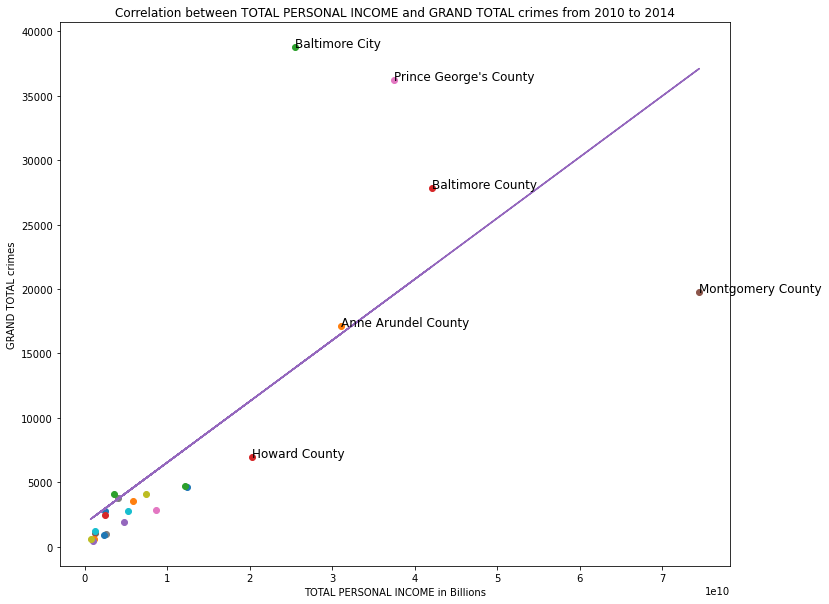

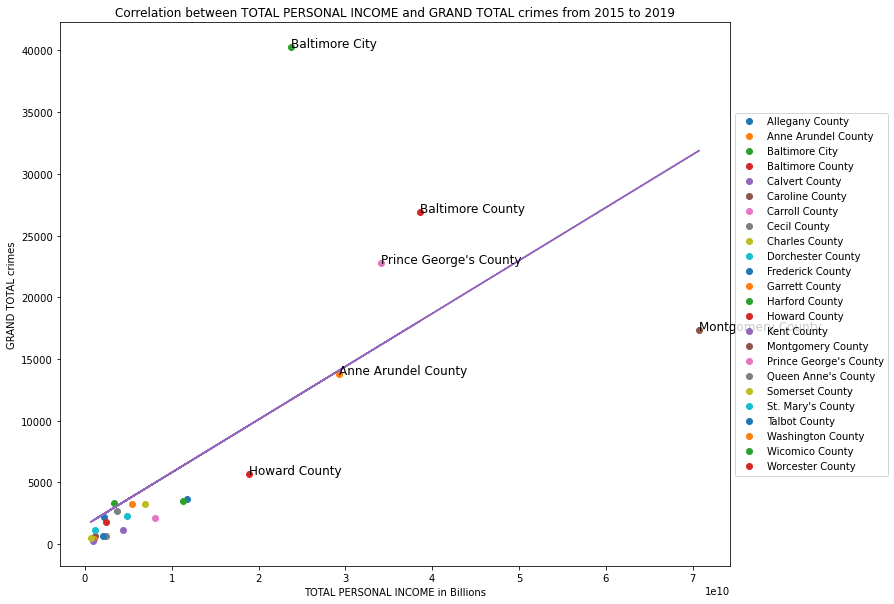

In [14]:
start_year = [2010, 2015]
end_year = [2014, 2019]

for sy, ey in zip(start_year, end_year):
    temp = Maryland_Crime_2010_2019[Maryland_Crime_2010_2019['YEAR'] >= sy]
    temp = temp[temp['YEAR'] <= ey]
    
    # creates the graph and the x, y axis
    plt.figure(figsize = (12, 10))
    plt.title(f"Correlation between TOTAL PERSONAL INCOME and GRAND TOTAL crimes from {sy} to {ey}")
    plt.xlabel("TOTAL PERSONAL INCOME in Billions")
    plt.ylabel("GRAND TOTAL crimes")
    
    # empty x y lists used for line of best fit later
    x = []
    y = []
    
    # for each jurisdiction, obtains the mean PER CAPITA PERSONAL INCOME and GRAND TOTAL crime
    for j in jurisdiction:
        curr_jurisdiction_table = temp[temp['JURISDICTION'] == j]
        curr_jurisdiction_table_mean = curr_jurisdiction_table.mean()
        plt.plot(curr_jurisdiction_table_mean['TOTAL PERSONAL INCOME'], curr_jurisdiction_table_mean['GRAND TOTAL'], 'o')
        if j in interesting_jurisdictions:
            plt.annotate(j, (curr_jurisdiction_table_mean['TOTAL PERSONAL INCOME'], curr_jurisdiction_table_mean['GRAND TOTAL']), size = 12)

        x.append(curr_jurisdiction_table_mean['TOTAL PERSONAL INCOME'])
        y.append(curr_jurisdiction_table_mean['GRAND TOTAL'])
        
    # removes data that is equal to nan
    x = [i for i in x if math.isnan(i) == False]
    y = [i for i in y if math.isnan(i) == False]

    # produces the line of best fit
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef)  
    plt.plot(x, poly1d_fn(x))
plt.legend(jurisdiction, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

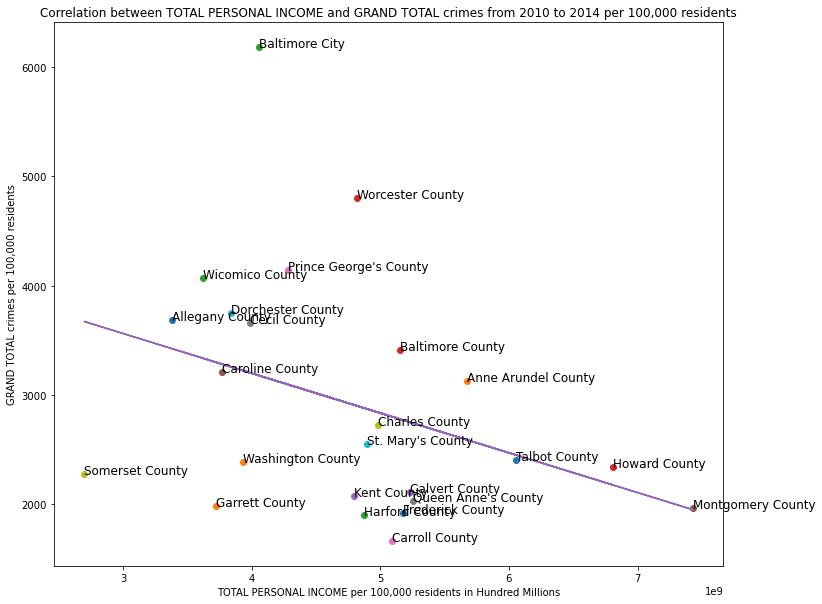

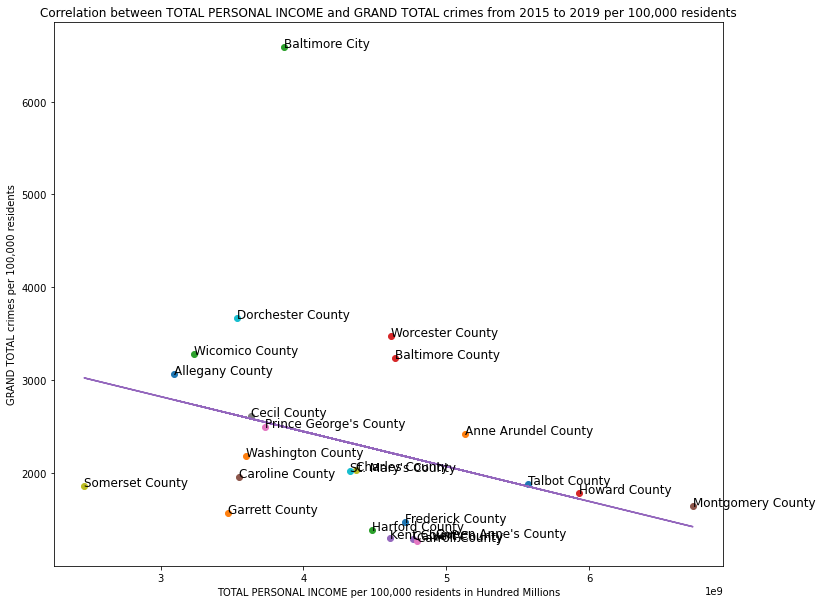

In [15]:
for sy, ey in zip(start_year, end_year):
    temp = Maryland_Crime_2010_2019[Maryland_Crime_2010_2019['YEAR'] >= sy]
    temp = temp[temp['YEAR'] <= ey]
    
    # creates the graph and the x, y axis
    plt.figure(figsize = (12, 10))
    plt.title(f"Correlation between TOTAL PERSONAL INCOME and GRAND TOTAL crimes from {sy} to {ey} per 100,000 residents")
    plt.xlabel("TOTAL PERSONAL INCOME per 100,000 residents in Hundred Millions")
    plt.ylabel("GRAND TOTAL crimes per 100,000 residents")
    
    # empty x y lists used for line of best fit later
    x = []
    y = []
    
    # for each jurisdiction, obtains the mean PER CAPITA PERSONAL INCOME PER 100,000 and OVERALL CRIME RATE PER 100,000 PEOPLE
    for j in jurisdiction:
        curr_jurisdiction_table = temp[temp['JURISDICTION'] == j]
        curr_jurisdiction_table_mean = curr_jurisdiction_table.mean()
        plt.plot(curr_jurisdiction_table_mean['TOTAL PERSONAL INCOME PER 100,000'], curr_jurisdiction_table_mean['OVERALL CRIME RATE PER 100,000 PEOPLE'], 'o')
        plt.annotate(j, (curr_jurisdiction_table_mean['TOTAL PERSONAL INCOME PER 100,000'], curr_jurisdiction_table_mean['OVERALL CRIME RATE PER 100,000 PEOPLE']), size = 12)

        x.append(curr_jurisdiction_table_mean['TOTAL PERSONAL INCOME PER 100,000'])
        y.append(curr_jurisdiction_table_mean['OVERALL CRIME RATE PER 100,000 PEOPLE'])
        
        # removes data that is equal to nan
    x = [i for i in x if math.isnan(i) == False]
    y = [i for i in y if math.isnan(i) == False]

    # produces the line of best fit
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef)  
    plt.plot(x, poly1d_fn(x))
plt.show()

This is where it got interesting because looking at the first two plots, the regression line had a positive slope, which implies the more money the jurisdiction makes, the higher the crime rate. Baltimore City, Baltimore County and Prince Geroge's county were outliers that showed that these counties had a higher crime rate despite having an total income in the 2-4 billions. Baltimore City had a crime rate far aboce the expected regression line And Montgomery county (the highest total personal income) far below the expected regression line.

But as we look at the crime rate to total personal income per 100,000 residents, we see that the it contradicts the the previous two plots and we have a line with a negative slope, The more money the jurisdiction makes, the lower the crime rate making it the most ideal place to live in in terms of income and safety. Montgomery County has the higest total income per 100,000 resident and has a total crime total of less than 2,000 per 100,000 resident making it one of the saftest place to live in Maryland. However, Baltimore city is still far above the regression line in terms of safety. Baltimore city despite being on the poor side, still has the most grand total crime per 100,000 residents

## 5. Conclusion

### 5.1 Recap

With this tutorial, I set out to see the change in crime rate in the different jurisdictions across Maryland. From data analysis and visualization plots, I can see that while some parts of maryland do have higher crime rates compared to others, if I'm looking at crime rate per 100,000 residents, Baltimore City does stand out but most other places are not that far away in terms of crime rate per 100,000. If we're looking at the change of crime rates per 100,000 over the year 1975 to 2019, most jurisdictions on average saw a decrease in crime rate, meaning, most jurisdictions are getting safer each year. lastly I checked to see if there is a relation between crime rate and total personal income. I saw that if just looking directly at crime rate to total personal income, there was a positive relation, meaning the more money a jurisdiction makes, the higher the crime rate. However, when looking at crime rate and total personal income both per 100,000 residents, there was a negative relation meaning the more money a jurisdiction makes, the lower the crime rate.

Baltimore City was and still is a pretty dangrous place to live in. between the 1990s and early 2000s, Baltimore City saw a high in crime rates most likey due to the fact the crack cocain was introduced into the drug market, which lead to more violence. However according the the percentage crime changes Baltimore city is geting safer, but only time will tell if or when Baltimore City can become one of the more safer cities in Maryland.